In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [105]:
data = pd.read_csv("inpatientCharges.csv")
data.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


In [106]:
data.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')

In [107]:

data [["State_name", "Region"]] = data["Hospital Referral Region Description"].str.split(" - ", expand= True)
data[["DRG_code","Procedure_name"]] = data["DRG Definition"].str.split(" - ", expand=True)

data= data.drop("State_name", axis=1)
data.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Region,DRG_code,Procedure_name
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73,Dothan,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71,Birmingham,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79,Birmingham,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16,Birmingham,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44,Birmingham,039,EXTRACRANIAL PROCEDURES W/O CC/MCC


In [108]:
data[" Average Covered Charges "] = data[" Average Covered Charges "].str.lstrip("$")
data[" Average Total Payments "] = data[" Average Total Payments "].str.lstrip("$")
data["Average Medicare Payments"] = data["Average Medicare Payments"].str.lstrip("$")

data = data.astype({"Average Medicare Payments": "float32", " Average Total Payments ": "float32", " Average Covered Charges ":"float32"})

data.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Region,DRG_code,Procedure_name
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.070312,5777.240234,4763.729980,Dothan,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.849609,5787.569824,4976.709961,Birmingham,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.371094,5434.950195,4453.790039,Birmingham,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.280273,5417.560059,4129.160156,Birmingham,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.269531,5658.330078,4851.439941,Birmingham,039,EXTRACRANIAL PROCEDURES W/O CC/MCC


In [109]:
# top 5 expensive procedures
data.groupby("Procedure_name")[" Average Covered Charges "].sum().sort_values(ascending=False).head(5)

Procedure_name
MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC                            199748464.0
INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC                191520416.0
RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS           166806816.0
SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS                            153270464.0
MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC    143173072.0
Name:  Average Covered Charges , dtype: float32

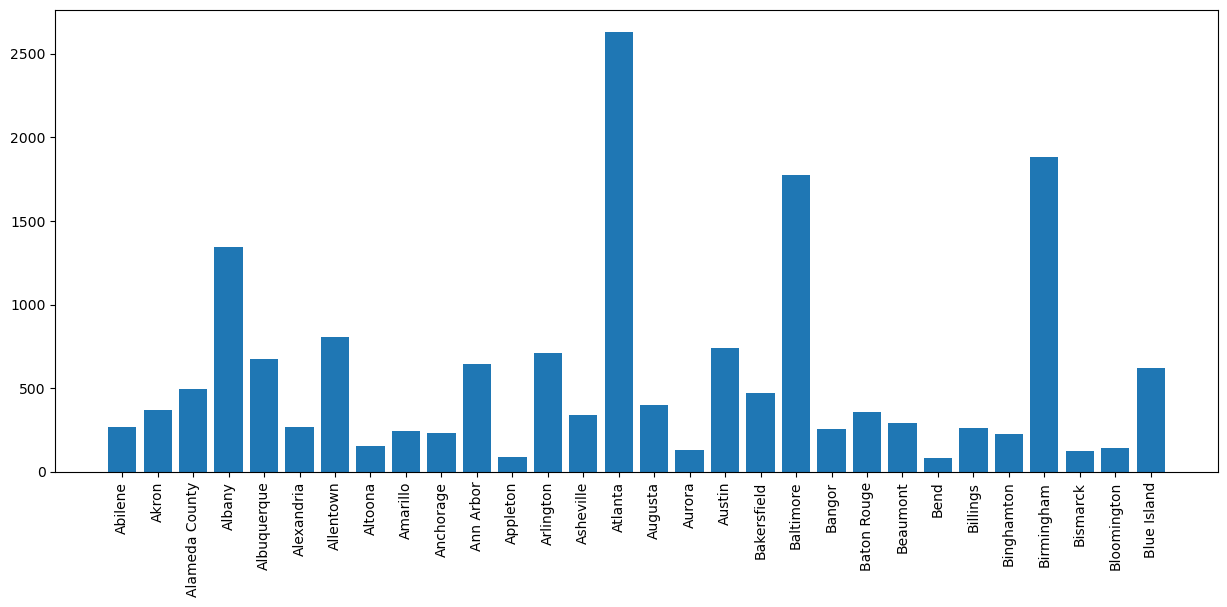

In [110]:
# no of procedures as per region
proc_region = data.groupby("Region")["Provider Id"].count().head(30)
plt.figure(figsize=(15,6))
plt.bar(proc_region.index,proc_region.values)
plt.tick_params(axis="x", labelrotation=90)
plt.show()

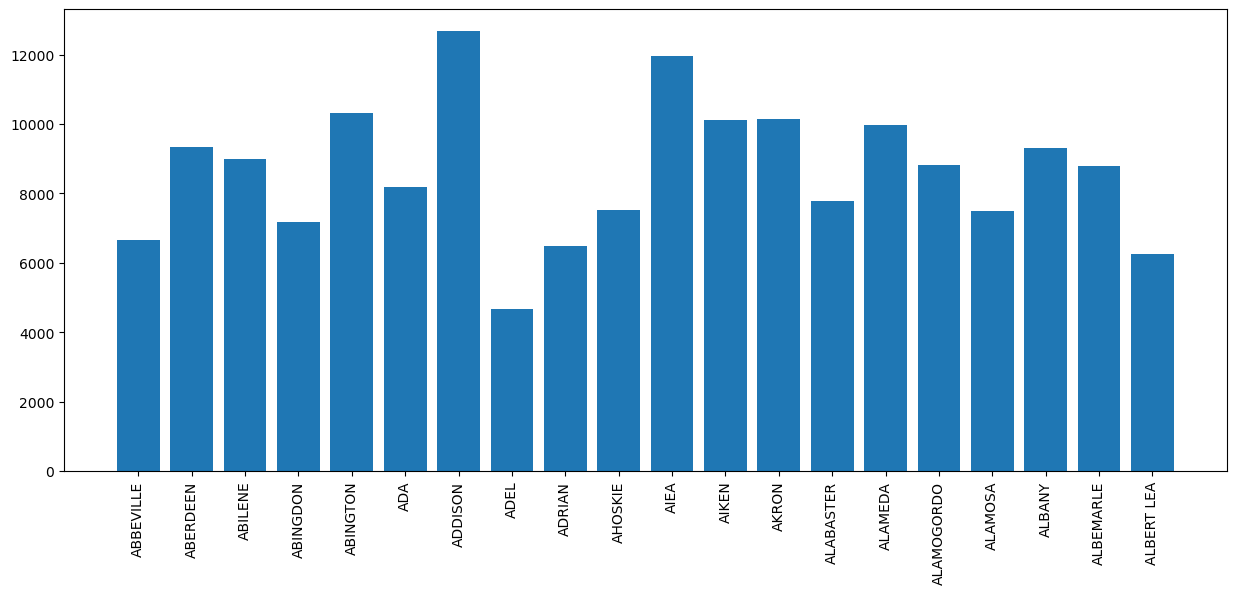

In [111]:
# citywise average total payments
city_pay = data.groupby("Provider City")[" Average Total Payments "].mean().head(20)
#print(city_pay)
plt.figure(figsize=(15,6))
plt.bar(city_pay.index, city_pay.values)
plt.tick_params(axis="x", labelrotation=90)
plt.show()

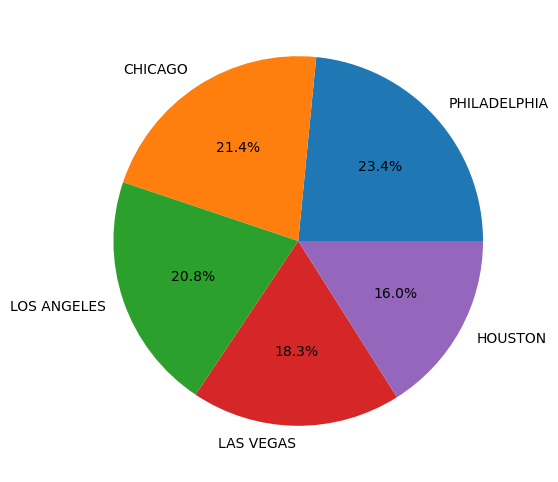

In [112]:
# top 5 cities with highest covered charges
city_charges = data.groupby("Provider City")[" Average Covered Charges "].sum().sort_values(ascending=False).head(5)
city_charges

plt.figure(figsize=(15,6))
plt.pie(city_charges.values, labels=city_charges.index, autopct="%1.1f%%")
plt.show()

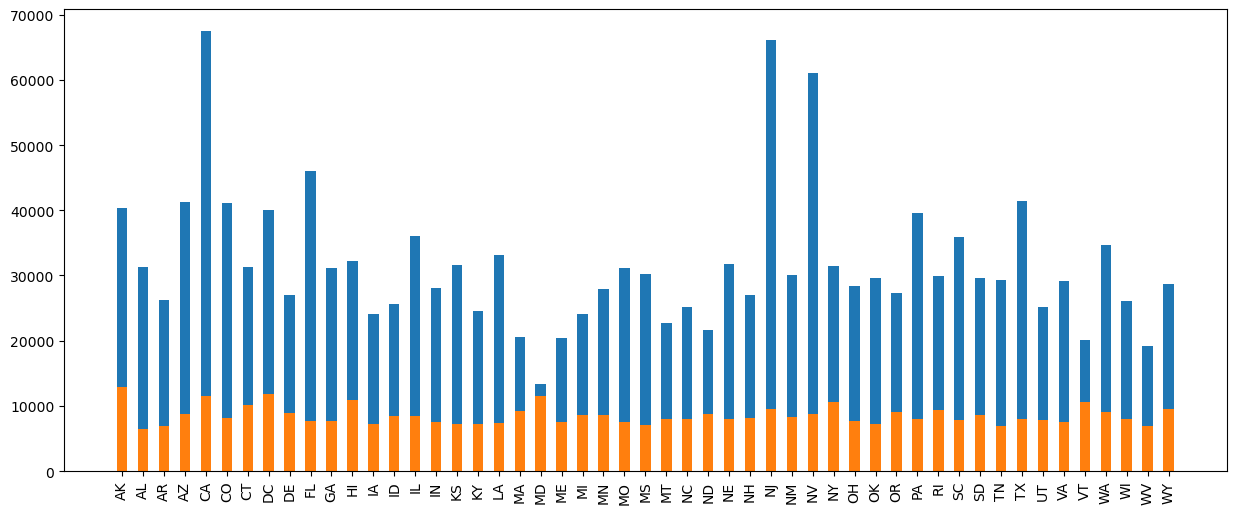

In [113]:
# Statewise average covered charges vs average medicare payments

avg_charges = data.groupby("Provider State")[[" Average Covered Charges ", "Average Medicare Payments"]].mean()

plt.figure(figsize=(15,6))
plt.bar(avg_charges.index,avg_charges[" Average Covered Charges "],width=0.5)
plt.bar(avg_charges.index,avg_charges["Average Medicare Payments"],width=0.5)
plt.tick_params(axis="x",labelrotation=90)
plt.show()

# experimentation
# numeric = np.arange(len(avg_charges.index))
# plt.figure(figsize=(15,6))
# plt.bar(numeric - 0.2,avg_charges[" Average Covered Charges "], width = 0.4)
# plt.bar(numeric + 0.2,avg_charges["Average Medicare Payments"], width =0.4)
# plt.tick_params(axis="x",labelrotation=90)
# plt.show()